In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
doc = pd.read_csv(r"C:\Users\FPTSHOP\Downloads\DU_LIEU_FB_DACHUANHOA.csv")
print(doc)
# kiểm tra giá trị lỗi
doc.isnull().sum()

     So_bai_viet  So_binh_luan  So_luot_thich  So_bai_viet_Normalized  \
0             88           183            386                0.888889   
1             78           198            218                0.787879   
2             64           188            376                0.646465   
3             92           198            299                0.929293   
4             57           124            432                0.575758   
..           ...           ...            ...                     ...   
295           10            16             72                0.101010   
296           16            48             25                0.161616   
297            7            19             46                0.070707   
298            3            47             85                0.030303   
299            5            24             55                0.050505   

     So_binh_luan_Normalized  So_luot_thich_Normalized  
0                   0.919598                  0.786151  
1        

So_bai_viet                 0
So_binh_luan                0
So_luot_thich               0
So_bai_viet_Normalized      0
So_binh_luan_Normalized     0
So_luot_thich_Normalized    0
dtype: int64

In [8]:
X = doc[['So_bai_viet_Normalized', 'So_binh_luan_Normalized', 'So_luot_thich_Normalized']].values


In [9]:
k = 3
centers = X[np.random.choice(X.shape[0], k, replace=False)]


In [10]:
def khoangcach_euclide(X, centers):
    khoangcach = []
    for center in centers:
        khoangcach.append(np.linalg.norm(X - center, axis=1))
    return np.array(khoangcach)


In [11]:
def gan_nhan(khoangcach):
    return np.argmin(khoangcach, axis=0)


In [12]:
def update_centers(X, labels, k):
    centers = []
    for i in range(k):
        centers.append(np.mean(X[labels == i], axis=0))
    return np.array(centers)


In [13]:
def dieu_kien_dung(old_centers, centers, tol=1e-4):
    return np.linalg.norm(centers - old_centers) < tol


In [14]:
def k_means(X, k):
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    while True:
        old_centers = centers
        khoangcach = khoangcach_euclide(X, centers)
        labels = gan_nhan(khoangcach)
        centers = update_centers(X, labels, k)
        if dieu_kien_dung(old_centers, centers):
            break
    return labels, centers


In [15]:
def tinh_MSE(X, labels, centers):
    MSE = 0
    for i in range(k):
        cluster_point = X[labels == i]
        MSE += np.sum((cluster_point - centers[i]) ** 2)
    MSE /= X.shape[0]
    return MSE


In [16]:
labels, centers = k_means(X, k)
MSE = tinh_MSE(X, labels, centers)
print(f"Mean square error: {MSE}")


Mean square error: 0.0325459688233334


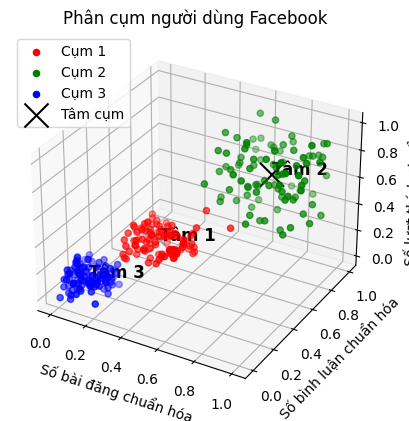

Cụm 1 (Người dùng ít tương tác): Có số lượng bài đăng, bình luận và lượt thích thấp.
Cụm 2 (Người dùng bình thường): Có mức độ bài đăng, bình luận và lượt thích trung bình.
Cụm 3 (Người dùng tương tác thường xuyên): Có số lượng bài đăng, bình luận và lượt thích cao.


In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i in range(k):
    ax.scatter(X[labels == i][:, 0], X[labels == i][:, 1], X[labels == i][:, 2], c=colors[i], label=f'Cụm {i+1}')
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='x', s=300, c='black', label='Tâm cụm')

# Gán nhãn cho các tâm cụm
for i, center in enumerate(centers):
    ax.text(center[0], center[1], center[2], f'Tâm {i+1}', color='black', fontsize=12, weight='bold')

ax.set_xlabel('Số bài đăng chuẩn hóa')
ax.set_ylabel('Số bình luận chuẩn hóa')
ax.set_zlabel('Số lượt thích chuẩn hóa')
ax.set_title('Phân cụm người dùng Facebook')
ax.legend()

plt.show()

# Giải thích cụm
for i in range(k):
    if i == 0:
        print(f'Cụm {i+1} (Người dùng ít tương tác): Có số lượng bài đăng, bình luận và lượt thích thấp.')
    elif i == 1:
        print(f'Cụm {i+1} (Người dùng bình thường): Có mức độ bài đăng, bình luận và lượt thích trung bình.')
    elif i == 2:
        print(f'Cụm {i+1} (Người dùng tương tác thường xuyên): Có số lượng bài đăng, bình luận và lượt thích cao.')
